1. Veri Yükleme ve Ön Hazırlık

In [45]:
import pandas as pd

# Veri setini yükleyelim
data = pd.read_csv('organised_Gen.csv')

# İlk 5 satırı görelim
data.head()

# Veri setinin genel bilgileri
data.info()

# Eksik değerlerin sayısı
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.5+ MB


,0
Unnamed: 0,0
YEAR,0
MONTH,0
STATE,0
TYPE OF PRODUCER,0
ENERGY SOURCE,0
GENERATION (Megawatthours),0


2. Keşifsel Veri Analizi (Exploratory Data Analysis - EDA)



*   Yıllara Göre Enerji Üretimi




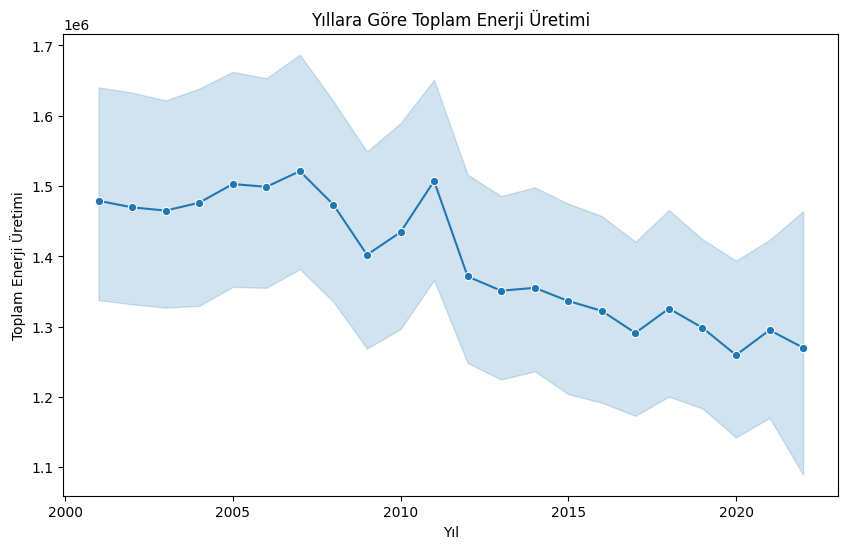

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x='YEAR', y='GENERATION (Megawatthours)', data=data, marker='o')
plt.title('Yıllara Göre Toplam Enerji Üretimi')
plt.xlabel('Yıl')
plt.ylabel('Toplam Enerji Üretimi')
plt.show()




*   Enerji Kaynaklarının Dağılımı




<ipython-input-47-3323ec23f54e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='ENERGY SOURCE', palette='viridis')


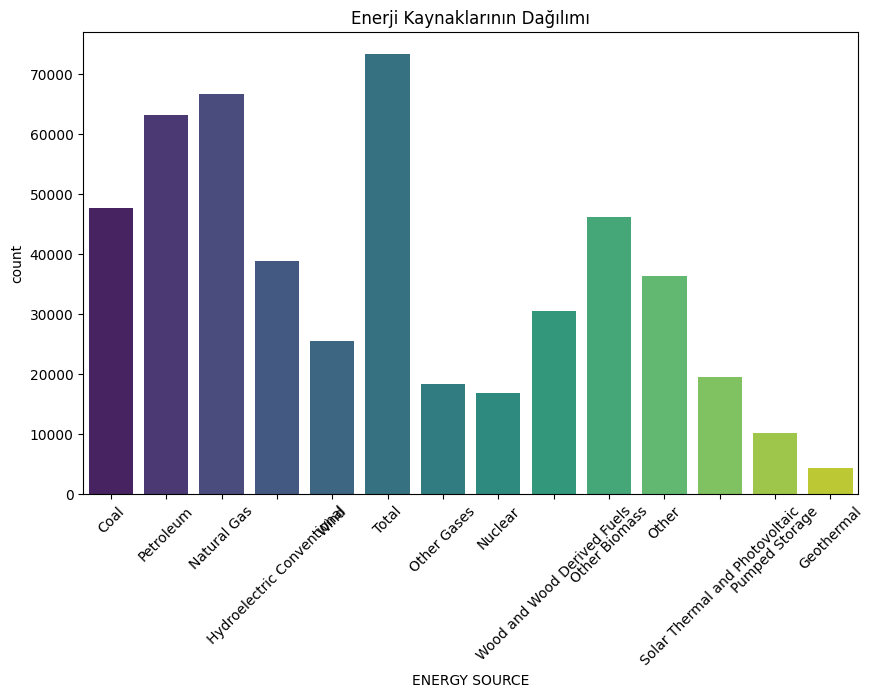

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='ENERGY SOURCE', palette='viridis')
plt.title('Enerji Kaynaklarının Dağılımı')
plt.xticks(rotation=45)
plt.show()


* Enerji Üretimi ve Kaynak Türlerinin Yıllara Göre Değişimi

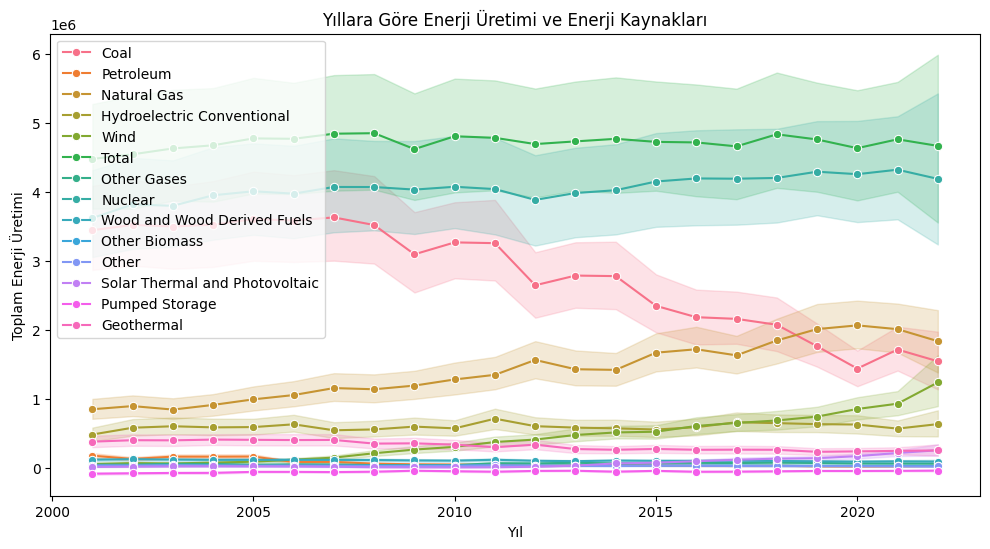

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YEAR', y='GENERATION (Megawatthours)', hue='ENERGY SOURCE', data=data, marker='o')
plt.title('Yıllara Göre Enerji Üretimi ve Enerji Kaynakları')
plt.xlabel('Yıl')
plt.ylabel('Toplam Enerji Üretimi')
plt.legend(loc='upper left')
plt.show()


Enerji Üretiminin İstatiksel Dağılımı

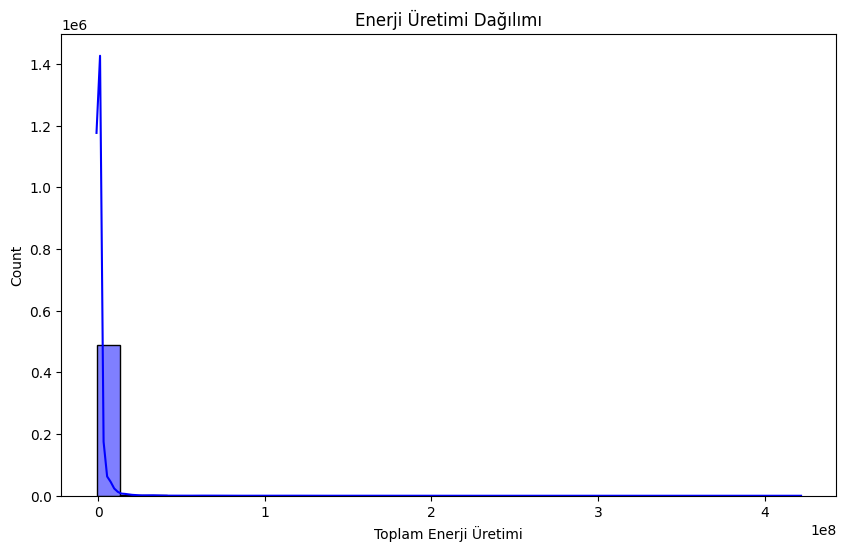

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(data['GENERATION (Megawatthours)'], bins=30, kde=True, color='blue')
plt.title('Enerji Üretimi Dağılımı')
plt.xlabel('Toplam Enerji Üretimi')
plt.show()


* Isı Haritası ile Korelasyon Matrisi

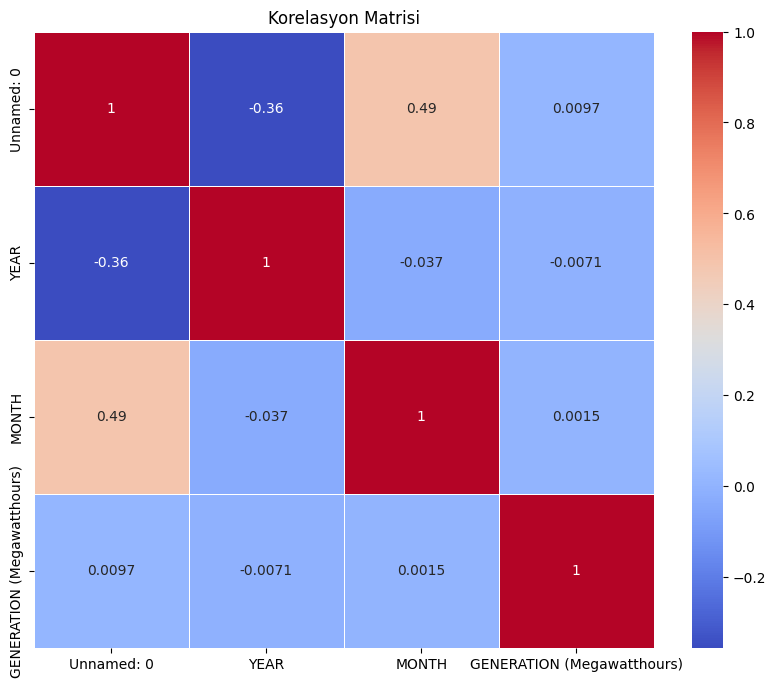

In [50]:
# Sayısal sütunları seçiyoruz
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplayıp görselleştiriyoruz
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


3. Veri Ön İşleme

In [51]:
# Eksik değerleri ortalama ile doldurma
# data.fillna(data.mean(), inplace=True)

# Kategorik verileri sayısal değerlere dönüştürme
data_encoded = pd.get_dummies(data, columns=['STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE'], drop_first=True)

# Bağımlı ve bağımsız değişkenleri ayırma
X = data_encoded.drop(columns=['Unnamed: 0', 'GENERATION (Megawatthours)'])
y = data_encoded['GENERATION (Megawatthours)']




# %80 eğitim, %20 test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Gözetimli Öğrenme: Model Eğitimi ve Karşılaştırma

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Kategorik değişkenlerin kontrolü
print(X_train.dtypes)


X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Doğrusal regresyon modeli eğitimi
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = linear_model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}")


YEAR                                            int64
MONTH                                           int64
STATE_AL                                         bool
STATE_AR                                         bool
STATE_AZ                                         bool
                                                ...  
ENERGY SOURCE_Pumped Storage                     bool
ENERGY SOURCE_Solar Thermal and Photovoltaic     bool
ENERGY SOURCE_Total                              bool
ENERGY SOURCE_Wind                               bool
ENERGY SOURCE_Wood and Wood Derived Fuels        bool
Length: 71, dtype: object
Linear Regression - MSE: 110026382304120.44, R2: 7.668402093585769e-05


In [53]:
from sklearn.tree import DecisionTreeRegressor

# Karar ağacı modeli eğitimi
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_tree = tree_model.predict(X_test)

# Performans metrikleri
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree - MSE: {mse_tree}, R2: {r2_tree}")


Decision Tree - MSE: 110123110809686.78, R2: -0.0008023877617595598


In [54]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [mse, mse_tree],
    'R2 Score': [r2, r2_tree]
})

print(results)


               Model           MSE  R2 Score
0  Linear Regression  1.100264e+14  0.000077
1      Decision Tree  1.101231e+14 -0.000802


Model Performans Metrikleri ve Değerlendirme

In [55]:
# Regresyon metrikleri
from sklearn.metrics import mean_squared_error, r2_score

# Tahmin yapma
y_pred = linear_model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 110026382304120.44
R^2 Score: 7.668402093585769e-05


Hiperparametre Optimizasyonu

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# KNN modelinin parametreleri için grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri gösterme
print(f"En iyi parametreler: {grid_search.best_params_}")


En iyi parametreler: {'n_neighbors': 7}


<ipython-input-57-5f8c86ec372e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results, palette='viridis')


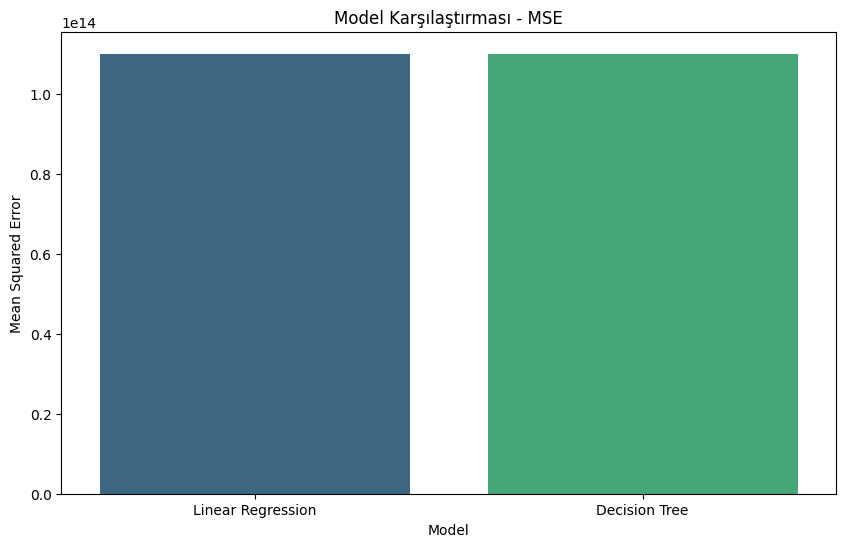

<ipython-input-57-5f8c86ec372e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results, palette='viridis')


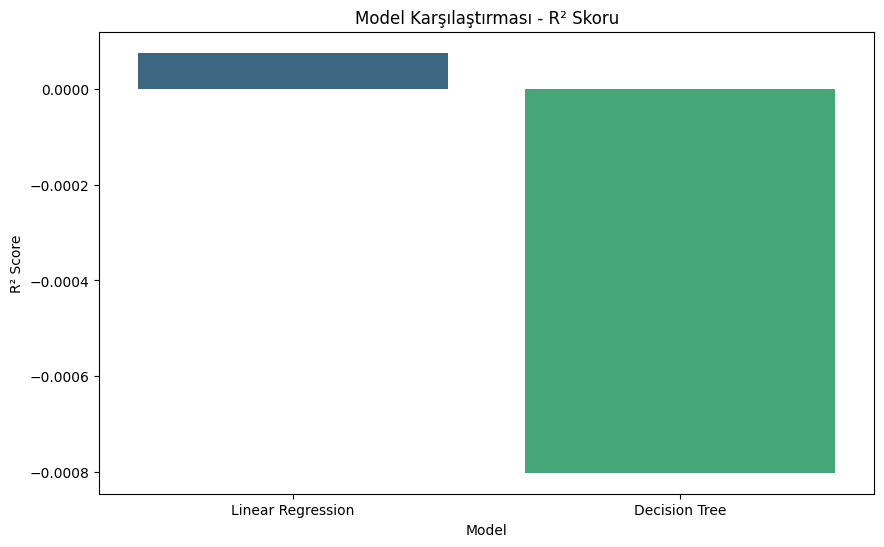

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))

# MSE için çubuk grafik
sns.barplot(x='Model', y='MSE', data=results, palette='viridis')
plt.title('Model Karşılaştırması - MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()

# R² skoru için çubuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=results, palette='viridis')
plt.title('Model Karşılaştırması - R² Skoru')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()
